In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
PATH = "data/iceberg/" 
# declare main working path
sz=224

Enable data augmentation, and precompute=True
Use lr_find() to find highest learning rate where loss is still clearly improving
Train last layer from precomputed activations for 1-2 epochs
Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
Unfreeze all layers
Set earlier layers to 3x-10x lower learning rate than next higher layer
Use lr_find() again
Train full network with cycle_mult=2 until over-fitting

In [2]:
# Uncomment the below if you need to reset your precomputed activations
!rm -rf {PATH}tmp
# this deletes tmp folder

In [3]:
arch=resnet34
# choose what kind of nn model we want
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz)) 
# tfms: Read in images and their labels given as sub-folder names -> setup the data we need
learn = ConvLearner.pretrained(arch, data, precompute=True) 
# set up model
learn.fit(0.01, 3)

100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch:   0, train_loss: 0.639475, val_loss: 0.470009, accuracy: 0.731250
epoch:   1, train_loss: 0.522904, val_loss: 0.403490, accuracy: 0.790625
epoch:   2, train_loss: 0.476954, val_loss: 0.400570, accuracy: 0.803125



In [4]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch:   0, train_loss: 1.058374, val_loss: 230.777008, accuracy: 0.681250



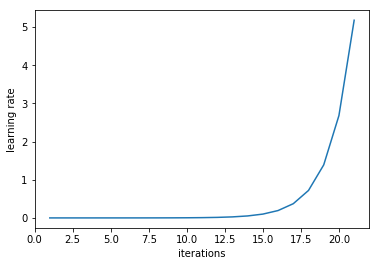

In [5]:
learn.sched.plot_lr()

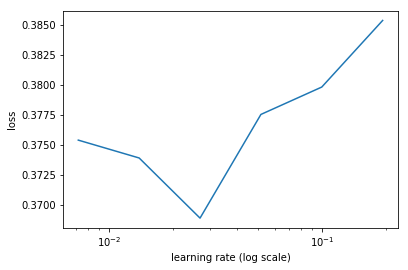

In [6]:
learn.sched.plot()

In [7]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.2)

In [8]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [9]:
best_lr = 1e-2
learn.fit(best_lr, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch:   0, train_loss: 0.676638, val_loss: 0.489330, accuracy: 0.718750
epoch:   1, train_loss: 0.537675, val_loss: 0.436909, accuracy: 0.768750



In [10]:
learn.precompute=False

In [11]:
learn.fit(best_lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch:   0, train_loss: 0.497414, val_loss: 0.432925, accuracy: 0.768750
epoch:   1, train_loss: 0.458191, val_loss: 0.439303, accuracy: 0.768750
epoch:   2, train_loss: 0.447254, val_loss: 0.447889, accuracy: 0.768750



In [12]:
learn.save('224_lastlayer')
learn.load('224_lastlayer')

In [13]:
learn.unfreeze()

In [14]:
lr=np.array([best_lr/9,best_lr/3,best_lr])

In [15]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.613874, val_loss: 0.606699, accuracy: 0.718750
epoch:   1, train_loss: 0.499387, val_loss: 0.425604, accuracy: 0.790625
epoch:   2, train_loss: 0.429341, val_loss: 0.400540, accuracy: 0.809375
epoch:   3, train_loss: 0.412252, val_loss: 0.438689, accuracy: 0.790625
epoch:   4, train_loss: 0.383485, val_loss: 0.431480, accuracy: 0.809375
epoch:   5, train_loss: 0.393802, val_loss: 0.391541, accuracy: 0.831250
epoch:   6, train_loss: 0.440928, val_loss: 0.550373, accuracy: 0.740625



In [16]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 95%|█████████▌| 20/21 [00:17<00:00,  1.15it/s, loss=2.55] 

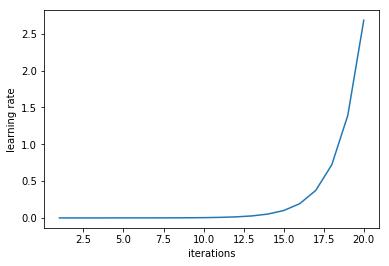

In [17]:
learn.sched.plot_lr()

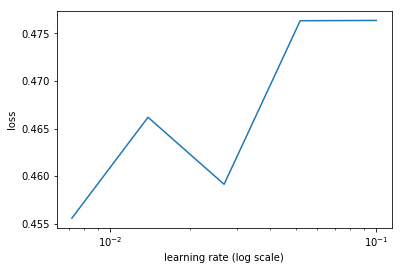

In [18]:
learn.sched.plot()

In [19]:
learn.save('224_all')
learn.load('224_all')

In [ ]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [ ]:
accuracy(probs, y)

In [23]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.298886, val_loss: 0.341660, accuracy: 0.856250
epoch:   1, train_loss: 0.310535, val_loss: 0.364807, accuracy: 0.837500
epoch:   2, train_loss: 0.300685, val_loss: 0.343834, accuracy: 0.831250
epoch:   3, train_loss: 0.292473, val_loss: 0.334355, accuracy: 0.840625
epoch:   4, train_loss: 0.321042, val_loss: 0.290061, accuracy: 0.859375
epoch:   5, train_loss: 0.294028, val_loss: 0.292986, accuracy: 0.862500
epoch:   6, train_loss: 0.293669, val_loss: 0.278827, accuracy: 0.881250

